# Homework 2

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
from scipy.optimize import fsolve

initial frequency guess: 54698600000.0
freq bin of decimated initial guess is: 497.40982857151647
corrected frequency: 54698717948.71785
at which the value of the expression is: [-1.08398126e-08]
value of the expression at initial frequency guess is: -13.512133253974298
normalized frequency estimate: [0.48838141]
normalized fa estimation is: [0.48838141]
normalized fad estimation is: [0.48838141]
freq bin of decimated signal is: [500.1025641]
adjusted normalized fad from psd is: 0.48828125
freq bin of decimated fa from psd is: 500


Text(0.5, 0, 'normalized discrete freq')

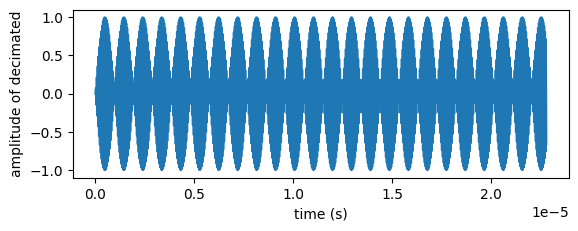

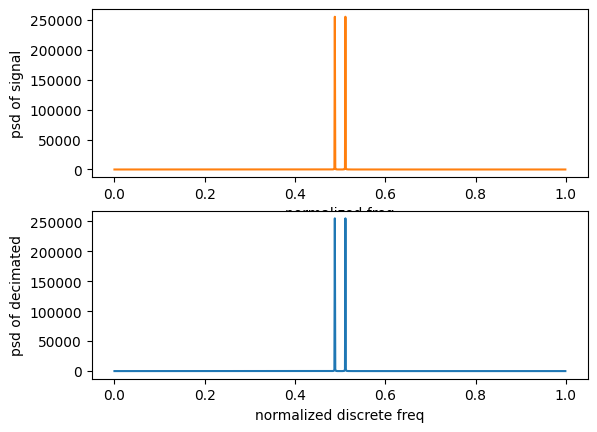

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
from scipy.optimize import fsolve

#from class
fft_size = 2**10       
DF = 2497  
fin = 54.6986e9
Fs=112e9

decimated_rate = Fs / DF
rounded_f = np.round(fin / decimated_rate)
freq_adjust = abs(fin - rounded_f * decimated_rate)
index_adjust = (decimated_rate / 2 - freq_adjust) * fft_size / decimated_rate
bin_position = fft_size // 2 - index_adjust

print("initial frequency guess:", fin)
print("freq bin of decimated initial guess is:", bin_position)

def f_adjust(input_freq):
    return DF - abs((input_freq - np.round(input_freq / Fs) * Fs) /
                                   (input_freq - np.round(input_freq / decimated_rate) * decimated_rate))

#solve for corrected frequency
corrected_f = fsolve(f_adjust, fin)
print("corrected frequency:", corrected_f[0])
print("at which the value of the expression is:", f_adjust(corrected_f))
print("value of the expression at initial frequency guess is:", f_adjust(fin))

#compute normalized frequency
normalized_freq = abs(corrected_f - np.round(corrected_f / Fs) * Fs) / Fs
print("normalized frequency estimate:", normalized_freq)

r1 = np.round(corrected_f / Fs)
r2 = np.round(2 * corrected_f / Fs)
r3 = np.round(3 * corrected_f / Fs)
fa = abs(corrected_f - r1 * Fs)
fa_normalized = fa / Fs
print("normalized fa estimation is:", fa_normalized)

fh2 = abs(2 * corrected_f - r2 * Fs)
fh3 = abs(3 * corrected_f - r3 * Fs)
decimated_rate = Fs / DF

r1d = np.round(corrected_f / decimated_rate)
r2d = np.round(2 * corrected_f / decimated_rate)
r3d = np.round(3 * corrected_f / decimated_rate)
fa_d = abs(corrected_f - r1d * decimated_rate)
print("normalized fad estimation is:", fa_d / decimated_rate)

index_adjust = (decimated_rate / 2 - fa_d) * fft_size / decimated_rate
bin_position = fft_size // 2 - index_adjust
print("freq bin of decimated signal is:", bin_position)

#signal def
time_series = np.arange(0, fft_size / Fs, 1 / Fs)
signal = np.sin(2 * np.pi * corrected_f * time_series)
plt.subplot(211)
plt.plot(time_series, signal)
plt.ylabel("amplitude")
plt.xlabel("time (s)")

#psd
psd_f = abs(fft(signal))**2
max_psd_index = np.argmax(psd_f[0:fft_size//2])
freq_range = np.arange(0, Fs, Fs / fft_size)
fa_n_psd = freq_range[max_psd_index] / Fs
plt.figure(1)
plt.subplot(211)
plt.plot(freq_range / Fs, psd_f)
plt.ylabel("psd of signal")
plt.xlabel("normalized freq")

time_series_d = np.arange(0, fft_size / decimated_rate, 1 / decimated_rate)
signal_d = np.sin(2 * np.pi * corrected_f * time_series_d)
plt.figure(2)
plt.subplot(212)
plt.plot(time_series_d, signal_d)
plt.ylabel("amplitude of decimated")
plt.xlabel("time (s)")

#psd of decimated signal
psd_signal_d = abs(fft(signal_d))**2
max_psd_index_d = np.argmax(psd_signal_d[0:fft_size//2])
freq_range_d = np.arange(0, decimated_rate, decimated_rate / fft_size)
fa_n_psd_d = freq_range_d[max_psd_index_d] / decimated_rate
print("adjusted normalized fad from psd is:", fa_n_psd_d)
print("freq bin of decimated fa from psd is:", max_psd_index_d)
plt.figure(1)
plt.subplot(212)
plt.plot(freq_range_d / decimated_rate, psd_signal_d)
plt.ylabel("psd of decimated")
plt.xlabel("normalized discrete freq")